# All about plot annotations

yt has a large number of plot callbacks in the "annotation" category that add information to a plot, whether that's new data or new text. To check out a list, create a plot, saving the plot object as a variable:

yt : [INFO     ] 2025-07-13 22:35:31,438 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/Enzo_64/DD0043/data0043'
yt : [INFO     ] 2025-07-13 22:35:31,521 Parameters: current_time              = 645.81707236914
yt : [INFO     ] 2025-07-13 22:35:31,521 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-07-13 22:35:31,522 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-13 22:35:31,523 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-13 22:35:31,523 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-07-13 22:35:31,524 Parameters: current_redshift          = 0.0013930880640796
yt : [INFO     ] 2025-07-13 22:35:31,524 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-07-13 22:35:31,525 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-07-13 22:35:31,526 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-07-13 22:35:31,527 Parameters:


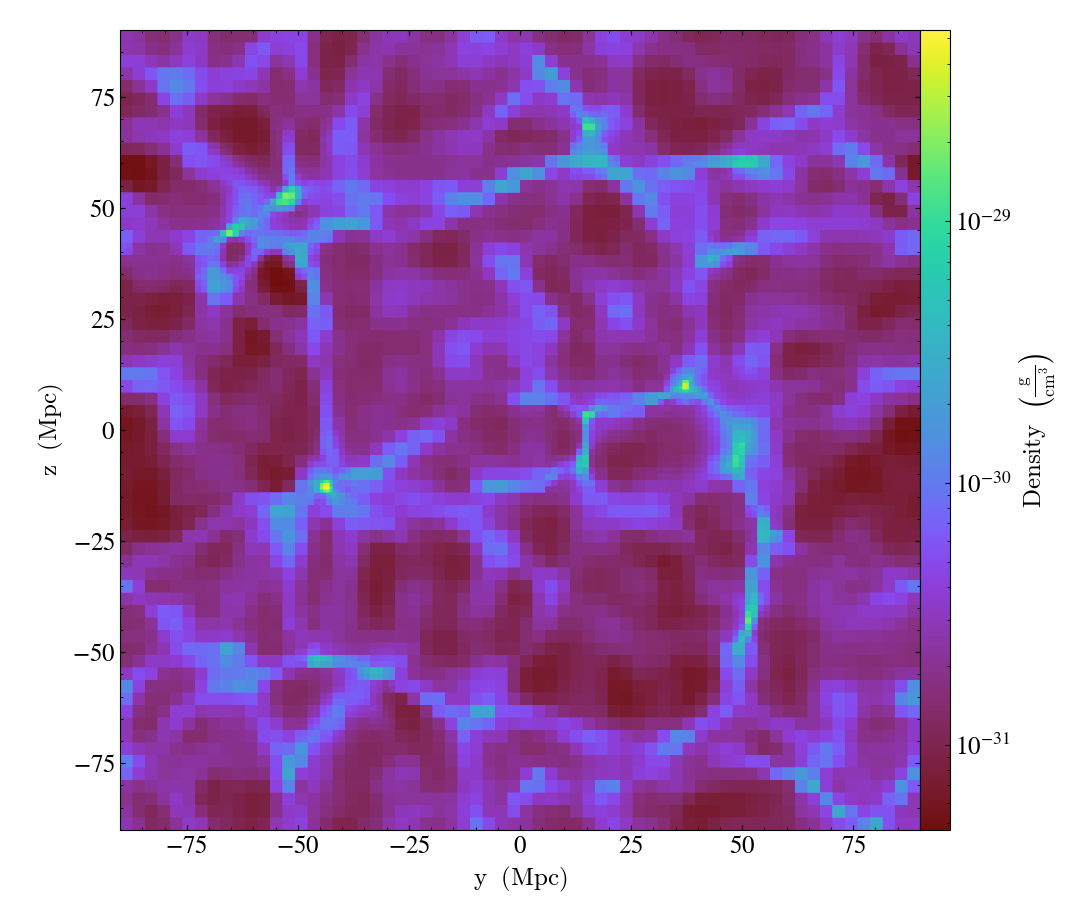

In [14]:
import yt 
ds = yt.load_sample("Enzo_64")

slc = yt.SlicePlot(ds, 'x', ('gas', 'density'))
slc

now start typing `slc.annotate_` and hit tab to see a list of available annotations.

In [ ]:
slc.annotate_

You can also check the list at https://yt-project.org/doc/visualizing/callbacks.html


Some are essentially wrappers of base matplotlib plot types: 



In [17]:
slc.annotate_contour?

Signature:
slc.annotate_contour(
    field: tuple[str, str] | str,
    levels: int = 5,
    *,
    factor: tuple[int, int] | int = 4,
    clim: tuple[float, float] | None = None,
    label: bool = False,
    take_log: bool | None = None,
    data_source: yt.data_objects.data_containers.YTDataContainer | None = None,
    plot_args: dict[str, typing.Any] | None = None,
    text_args: dict[str, typing.Any] | None = None,
    ncont: int | None = None,
) -> None
Docstring:
Add contours in *field* to the plot. *levels* governs the number of
contours generated, *factor* governs the number of points used in the
interpolation, *take_log* governs how it is contoured and *clim* gives
the (lower, upper) limits for contouring.  An alternate data source can be
specified with *data_source*, but by default the plot's data source will be
queried.
File:      ~/.pyenv/versions/yt-workshop/lib/python3.10/site-packages/yt/visualization/plot_modifications.py
Type:      method

In [16]:
slc.annotate_quiver?

Signature:
slc.annotate_quiver(
    field_x,
    field_y,
    field_c=None,
    *,
    factor: tuple[int, int] | int = 16,
    scale=None,
    scale_units=None,
    normalize=False,
    bv_x=0,
    bv_y=0,
    plot_args=None,
    **kwargs,
)
Docstring:
Adds a 'quiver' plot to any plot, using the *field_x* and *field_y*
from the associated data, skipping every *factor* pixels.
*field_c* is an optional field name used for color.
*scale* is the data units per arrow length unit using *scale_units*
and *plot_args* allows you to pass in matplotlib arguments (see
matplotlib.axes.Axes.quiver for more info). if *normalize* is True,
the fields will be scaled by their local (in-plane) length, allowing
morphological features to be more clearly seen for fields with
substantial variation in field strength.
File:      ~/.pyenv/versions/yt-workshop/lib/python3.10/site-packages/yt/visualization/plot_modifications.py
Type:      method

Others plot dataset-specific information. Try plotting


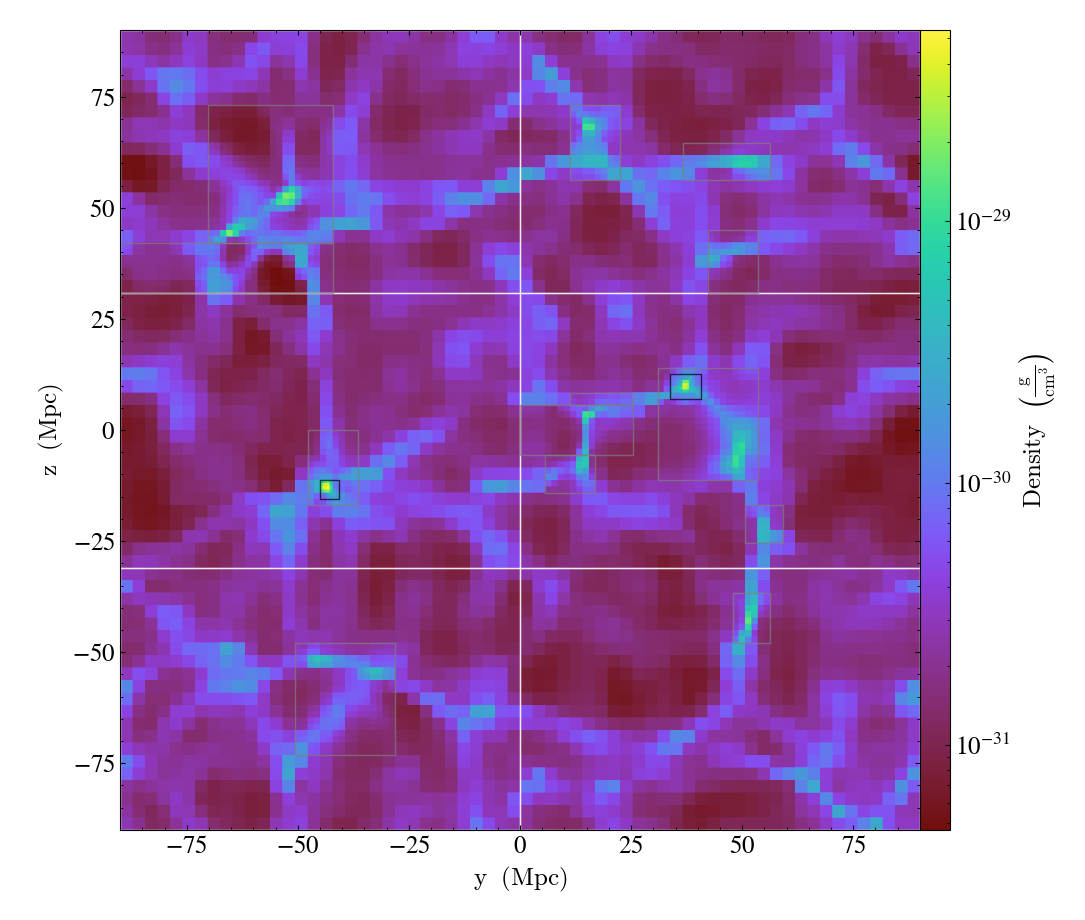

In [15]:
slc.annotate_grids()

Ok, let's do something!

Let's create a multipanel plot that shows: 

1. A sliceplot in one panel
2. A lineplot in a nother panel
3. The ray equivalent to the lineplot overlaid on the sliceplot



In [52]:
dxyz=ds.quan(0.1, 'code_length')
r = ds.ray(ds.domain_left_edge + dxyz, ds.domain_right_edge - dxyz)
r.start_point, r.end_point

(unyt_array([0.1, 0.1, 0.1], 'code_length'),
 unyt_array([0.9, 0.9, 0.9], 'code_length'))

yt : [INFO     ] 2025-07-13 22:56:52,118 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-13 22:56:52,118 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-13 22:56:52,121 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-13 22:56:52,121 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-13 22:56:52,122 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



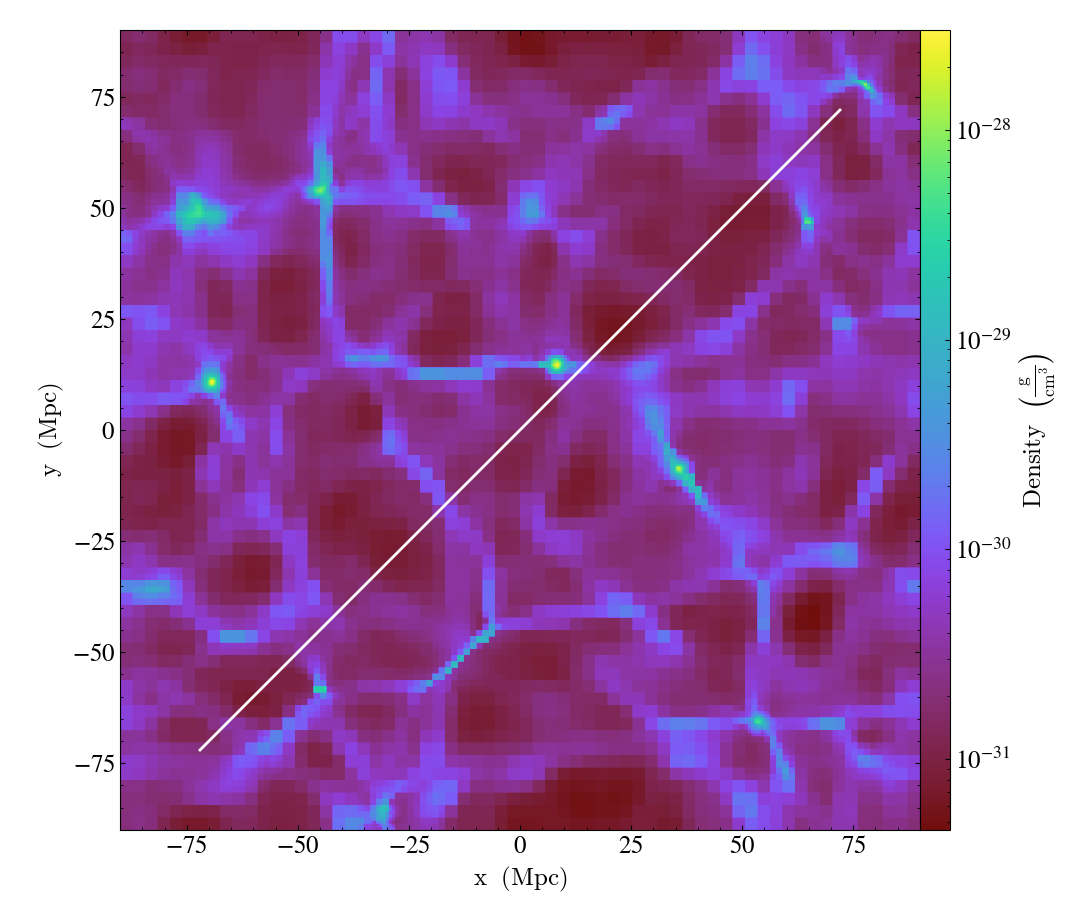

In [53]:
slc = yt.SlicePlot(ds, 'z', ('gas', 'density'))
slc.annotate_ray(r)



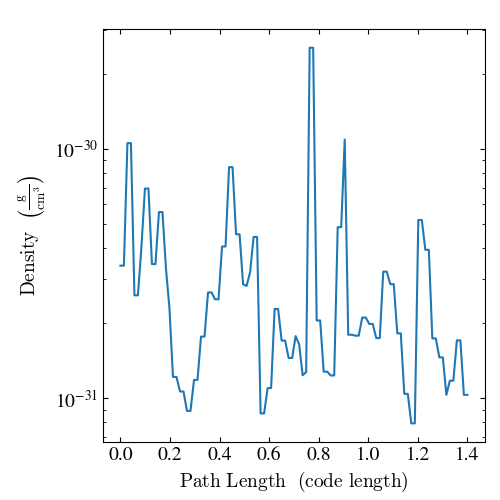

In [54]:
lp = yt.LinePlot(ds, ('gas', 'density'), r.start_point, r.end_point, 100)
lp


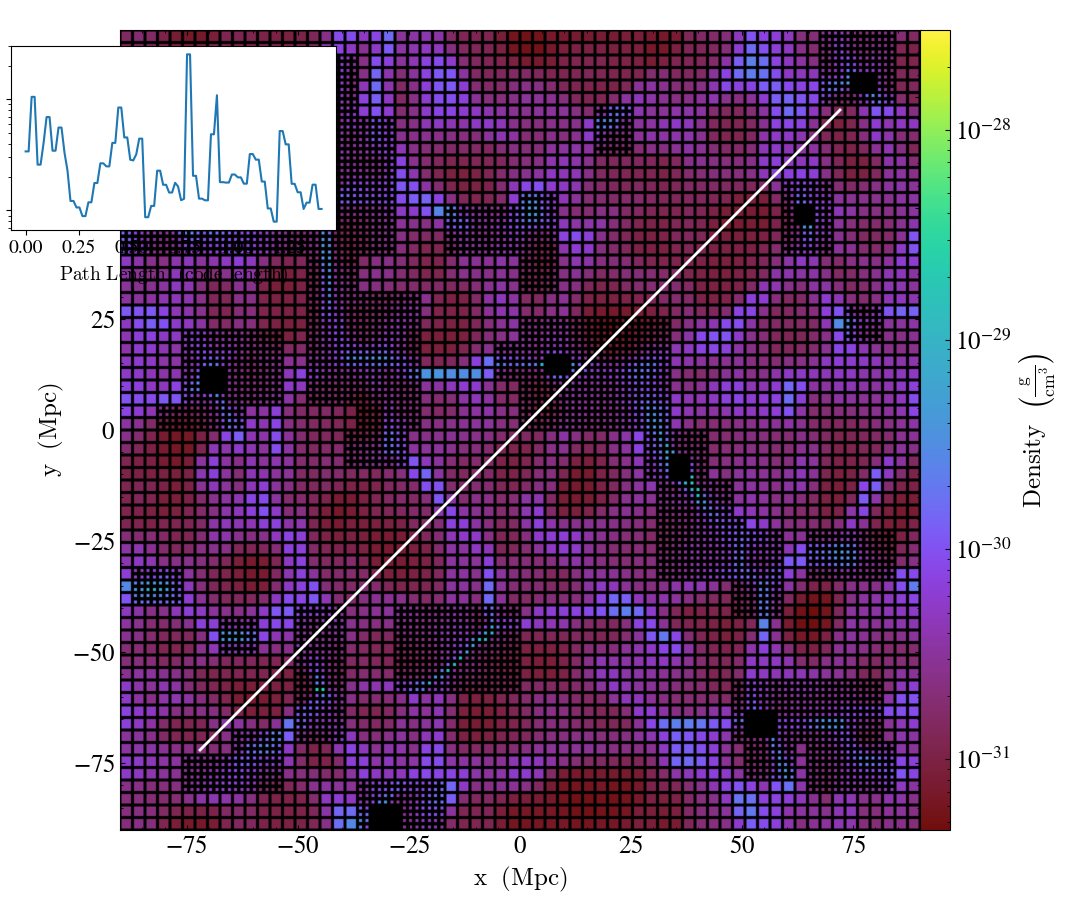

In [57]:
slc.annotate_cell_edges()

For bonus points, come back here after you work through CYOPA 05 on inset figures and create the following figure:

![](figures/CallbacksOverlaidLine.png)

In [55]:
slc = yt.SlicePlot(ds, 'z', ('gas', 'density'))
slc.annotate_ray(r)

lp = yt.LinePlot(ds, ('gas', 'density'), r.start_point, r.end_point, 100)

# now, add our new axes
zoom_box_axes = [0.01, 0.75, 0.3, 0.2]
ax2 = slc[('gas', 'density')].figure.add_axes(zoom_box_axes)

# over-ride p_whole_domain axes and figure for ('gas', 'density') to 
# point to the new axes and the figure for p_zoom ('gas', 'density')
lp.plots[('gas', 'density')].axes = ax2
lp.plots[('gas', 'density')].figure = slc.plots[('gas', 'density')].figure
lp.render()

# always reset before the final show/render!!
ax2.set_position(zoom_box_axes)
slc.save('figures/CallbacksOverlaidLine.png')

yt : [INFO     ] 2025-07-13 22:56:57,167 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-13 22:56:57,168 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-13 22:56:57,171 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-13 22:56:57,172 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-13 22:56:57,174 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2025-07-13 22:56:57,753 Saving plot figures/CallbacksOverlaidLine.png


['figures/CallbacksOverlaidLine.png']